In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [2]:
train = pd.read_csv('Train-Set.csv')
train

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,21243,38468,35,management,married,tertiary,no,750.0,yes,no,cellular,18,aug,233,12,-1,0,unknown,no
54708,45891,4378,31,services,married,high.school,no,NaN,no,no,telephone,may,wed,636,6,999,0,nonexistent,no
54709,42613,65128,35,management,married,tertiary,no,323.0,no,no,cellular,11,jan,261,2,-1,0,unknown,yes
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,27,apr,149,2,182,1,failure,no


In [3]:
test = pd.read_csv('Test-Set.csv')
test

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45247,74249,34,admin.,married,university.degree,no,NaN,no,no,cellular,jul,wed,266,1,999,0,nonexistent
1,19894,35779,31,management,single,tertiary,no,165.0,no,yes,cellular,8,aug,523,2,-1,0,unknown
2,70048,66769,28,blue-collar,single,basic.9y,no,NaN,no,no,telephone,may,fri,489,2,999,0,nonexistent
3,24241,27888,57,admin.,divorced,secondary,no,1878.0,yes,no,cellular,17,nov,219,1,-1,0,unknown
4,20495,63306,55,management,divorced,tertiary,no,277.0,no,no,cellular,12,aug,101,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,62765,902,36,blue-collar,married,basic.6y,no,NaN,no,no,telephone,may,fri,203,5,999,0,nonexistent
23445,28615,39745,44,services,married,secondary,no,133.0,no,no,cellular,29,jan,202,3,-1,0,unknown
23446,55510,40150,31,blue-collar,married,basic.9y,no,NaN,yes,no,cellular,jul,wed,590,1,999,0,nonexistent
23447,53035,6012,43,management,divorced,high.school,no,NaN,yes,no,cellular,nov,mon,488,2,999,0,nonexistent


In [4]:
# We need to check missing values in dataset
train.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       22870
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
dtype: int64

In [5]:
test.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       10080
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23449 entries, 0 to 23448
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23449 non-null  int64  
 1   id          23449 non-null  int64  
 2   age         23449 non-null  int64  
 3   job         23449 non-null  object 
 4   marital     23449 non-null  object 
 5   education   23449 non-null  object 
 6   default     23449 non-null  object 
 7   balance     13369 non-null  float64
 8   housing     23449 non-null  object 
 9   loan        23449 non-null  object 
 10  contact     23449 non-null  object 
 11  day         23449 non-null  object 
 12  month       23449 non-null  object 
 13  duration    23449 non-null  int64  
 14  campaign    23449 non-null  int64  
 15  pdays       23449 non-null  int64  
 16  previous    23449 non-null  int64  
 17  poutcome    23449 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 3.2+ MB


In [8]:
# To check duplicated values 
train.duplicated().value_counts()

False    54712
dtype: int64

In [9]:
test.duplicated().value_counts()

False    23449
dtype: int64

In [10]:
train.drop(columns=['Unnamed: 0','id','pdays','balance'],inplace=True)

In [11]:
test.drop(columns=['Unnamed: 0','pdays','balance'],inplace=True)

In [12]:
test.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
previous      int64
poutcome     object
dtype: object

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,54712.0,40.580147,10.544504,17.0,32.0,39.0,48.0,98.0
duration,54712.0,257.282260,255.270335,0.0,103.0,180.0,318.0,4199.0
campaign,54712.0,2.679961,2.966822,1.0,1.0,2.0,3.0,58.0
previous,54712.0,0.407351,1.520253,0.0,0.0,0.0,0.0,58.0


In [14]:
test.describe(include="object").T

,count,unique,top,freq
job,23449,12,blue-collar,5131
marital,23449,4,married,14072
education,23449,11,secondary,6845
default,23449,3,no,21035
housing,23449,3,yes,12718
loan,23449,3,no,19534
contact,23449,3,cellular,15059
day,23449,41,may,3375
month,23449,17,may,4115
poutcome,23449,5,unknown,10902


In [16]:
for index, row in train.iterrows():
    if row['day'] in train['month'].values:
        train.at[index, 'month'] = row['day']

In [17]:
train

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,47,blue-collar,married,basic.9y,no,no,yes,cellular,apr,apr,583,2,1,failure,no
1,48,management,divorced,tertiary,no,yes,no,cellular,7,apr,725,3,0,unknown,no
2,38,technician,single,high.school,no,no,no,cellular,aug,aug,74,2,0,nonexistent,no
3,50,management,divorced,tertiary,no,yes,no,cellular,4,may,24,3,0,unknown,no
4,54,self-employed,married,high.school,no,yes,yes,cellular,aug,aug,904,3,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,management,married,tertiary,no,yes,no,cellular,18,aug,233,12,0,unknown,no
54708,31,services,married,high.school,no,no,no,telephone,may,may,636,6,0,nonexistent,no
54709,35,management,married,tertiary,no,no,no,cellular,11,jan,261,2,0,unknown,yes
54710,70,retired,married,secondary,no,no,no,cellular,27,apr,149,2,1,failure,no


In [18]:
for index, row in test.iterrows():
    if row['day'] in test['month'].values:
        test.at[index, 'month'] = row['day']

In [19]:
test

,id,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,74249,34,admin.,married,university.degree,no,no,no,cellular,jul,jul,266,1,0,nonexistent
1,35779,31,management,single,tertiary,no,no,yes,cellular,8,aug,523,2,0,unknown
2,66769,28,blue-collar,single,basic.9y,no,no,no,telephone,may,may,489,2,0,nonexistent
3,27888,57,admin.,divorced,secondary,no,yes,no,cellular,17,nov,219,1,0,unknown
4,63306,55,management,divorced,tertiary,no,no,no,cellular,12,aug,101,3,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,blue-collar,married,basic.6y,no,no,no,telephone,may,may,203,5,0,nonexistent
23445,39745,44,services,married,secondary,no,no,no,cellular,29,jan,202,3,0,unknown
23446,40150,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,jul,590,1,0,nonexistent
23447,6012,43,management,divorced,high.school,no,yes,no,cellular,nov,nov,488,2,0,nonexistent


In [20]:
train.drop(columns=['day'],inplace=True)
train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome,Target
0,47,blue-collar,married,basic.9y,no,no,yes,cellular,apr,583,2,1,failure,no
1,48,management,divorced,tertiary,no,yes,no,cellular,apr,725,3,0,unknown,no
2,38,technician,single,high.school,no,no,no,cellular,aug,74,2,0,nonexistent,no
3,50,management,divorced,tertiary,no,yes,no,cellular,may,24,3,0,unknown,no
4,54,self-employed,married,high.school,no,yes,yes,cellular,aug,904,3,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,management,married,tertiary,no,yes,no,cellular,aug,233,12,0,unknown,no
54708,31,services,married,high.school,no,no,no,telephone,may,636,6,0,nonexistent,no
54709,35,management,married,tertiary,no,no,no,cellular,jan,261,2,0,unknown,yes
54710,70,retired,married,secondary,no,no,no,cellular,apr,149,2,1,failure,no


In [21]:
test.drop(columns=['day'],inplace=True)
test

,id,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,74249,34,admin.,married,university.degree,no,no,no,cellular,jul,266,1,0,nonexistent
1,35779,31,management,single,tertiary,no,no,yes,cellular,aug,523,2,0,unknown
2,66769,28,blue-collar,single,basic.9y,no,no,no,telephone,may,489,2,0,nonexistent
3,27888,57,admin.,divorced,secondary,no,yes,no,cellular,nov,219,1,0,unknown
4,63306,55,management,divorced,tertiary,no,no,no,cellular,aug,101,3,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,blue-collar,married,basic.6y,no,no,no,telephone,may,203,5,0,nonexistent
23445,39745,44,services,married,secondary,no,no,no,cellular,jan,202,3,0,unknown
23446,40150,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,590,1,0,nonexistent
23447,6012,43,management,divorced,high.school,no,yes,no,cellular,nov,488,2,0,nonexistent


In [22]:
# feature variables
X= train.iloc[:, :-1]

# target variable
y= train.iloc[:, -1]

In [23]:
# load the prerequisite library to create model and pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
# create the category and numerical pipeline
X_cat = list(X.select_dtypes(exclude = 'int').columns)  #  categorical column
X_num = list(X.select_dtypes(exclude = 'object').columns)  # numerical column

In [25]:
X_num

['age', 'duration', 'campaign', 'previous']

In [26]:
X = train[X_cat + X_num]

In [27]:
X

,job,marital,education,default,housing,loan,contact,month,poutcome,age,duration,campaign,previous
0,blue-collar,married,basic.9y,no,no,yes,cellular,apr,failure,47,583,2,1
1,management,divorced,tertiary,no,yes,no,cellular,apr,unknown,48,725,3,0
2,technician,single,high.school,no,no,no,cellular,aug,nonexistent,38,74,2,0
3,management,divorced,tertiary,no,yes,no,cellular,may,unknown,50,24,3,0
4,self-employed,married,high.school,no,yes,yes,cellular,aug,nonexistent,54,904,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,management,married,tertiary,no,yes,no,cellular,aug,unknown,35,233,12,0
54708,services,married,high.school,no,no,no,telephone,may,nonexistent,31,636,6,0
54709,management,married,tertiary,no,no,no,cellular,jan,unknown,35,261,2,0
54710,retired,married,secondary,no,no,no,cellular,apr,failure,70,149,2,1


In [28]:
label_encoders = {}
for col in X_cat:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

C:\Users\emana\AppData\Local\Temp\ipykernel_38620\123570508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [29]:
# Standardize numerical features
scaler = StandardScaler()
X[X_num] = scaler.fit_transform(X[X_num])

C:\Users\emana\AppData\Local\Temp\ipykernel_38620\3507680571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X_num] = scaler.fit_transform(X[X_num])


In [30]:
X

,job,marital,education,default,housing,loan,contact,month,poutcome,age,duration,campaign,previous
0,1,1,2,0,0,2,0,0,0,0.608840,1.275983,-0.229190,0.389839
1,4,0,8,0,2,0,0,0,4,0.703677,1.832262,0.107874,-0.267952
2,9,2,3,0,0,0,0,1,1,-0.244693,-0.717999,-0.229190,-0.267952
3,4,0,8,0,2,0,0,8,4,0.893351,-0.913872,0.107874,-0.267952
4,6,1,3,0,2,2,0,1,1,1.272699,2.533485,0.107874,-0.267952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,4,1,8,0,2,0,0,1,4,-0.529204,-0.095125,3.141450,-0.267952
54708,7,1,3,0,0,0,1,8,1,-0.908552,1.483608,1.119066,-0.267952
54709,4,1,8,0,0,0,0,4,4,-0.529204,0.014564,-0.229190,-0.267952
54710,5,1,7,0,0,0,0,0,0,2.790091,-0.424190,-0.229190,0.389839


In [33]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [35]:
X_val.isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
age          0
duration     0
campaign     0
previous     0
dtype: int64

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [37]:


# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(X_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9241961118713418
best parameters are: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'entropy'}


[[8850  888]
 [ 508 9128]]
0.9279446681119026
              precision    recall  f1-score   support

          no       0.95      0.91      0.93      9738
         yes       0.91      0.95      0.93      9636

    accuracy                           0.93     19374
   macro avg       0.93      0.93      0.93     19374
weighted avg       0.93      0.93      0.93     19374



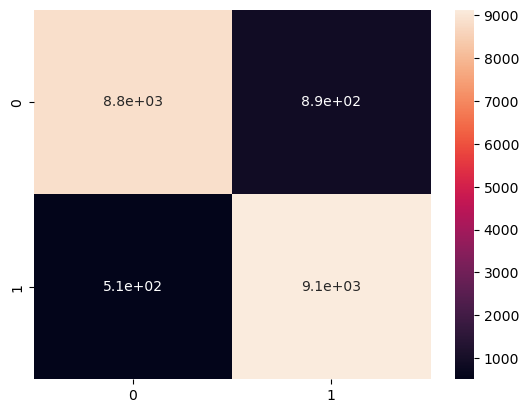

In [38]:
# checking model performance
y_predicted_rf= randomsearch_rf.predict(X_val)

print(confusion_matrix(y_val, y_predicted_rf))
sns.heatmap(confusion_matrix(y_val, y_predicted_rf), annot=True)
print(accuracy_score(y_val, y_predicted_rf))
print(classification_report(y_val, y_predicted_rf))

In [39]:
test

,id,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,74249,34,admin.,married,university.degree,no,no,no,cellular,jul,266,1,0,nonexistent
1,35779,31,management,single,tertiary,no,no,yes,cellular,aug,523,2,0,unknown
2,66769,28,blue-collar,single,basic.9y,no,no,no,telephone,may,489,2,0,nonexistent
3,27888,57,admin.,divorced,secondary,no,yes,no,cellular,nov,219,1,0,unknown
4,63306,55,management,divorced,tertiary,no,no,no,cellular,aug,101,3,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,902,36,blue-collar,married,basic.6y,no,no,no,telephone,may,203,5,0,nonexistent
23445,39745,44,services,married,secondary,no,no,no,cellular,jan,202,3,0,unknown
23446,40150,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,590,1,0,nonexistent
23447,6012,43,management,divorced,high.school,no,yes,no,cellular,nov,488,2,0,nonexistent


In [40]:
wanted_test_columns= test.drop('id',axis=1)

In [41]:
wanted_test_columns

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,34,admin.,married,university.degree,no,no,no,cellular,jul,266,1,0,nonexistent
1,31,management,single,tertiary,no,no,yes,cellular,aug,523,2,0,unknown
2,28,blue-collar,single,basic.9y,no,no,no,telephone,may,489,2,0,nonexistent
3,57,admin.,divorced,secondary,no,yes,no,cellular,nov,219,1,0,unknown
4,55,management,divorced,tertiary,no,no,no,cellular,aug,101,3,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,36,blue-collar,married,basic.6y,no,no,no,telephone,may,203,5,0,nonexistent
23445,44,services,married,secondary,no,no,no,cellular,jan,202,3,0,unknown
23446,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,590,1,0,nonexistent
23447,43,management,divorced,high.school,no,yes,no,cellular,nov,488,2,0,nonexistent


In [42]:
# create the category and numerical pipeline
X_cat = list(wanted_test_columns.select_dtypes(exclude = 'int').columns)  #  categorical column
X_num = list(wanted_test_columns.select_dtypes(exclude = 'object').columns) 

In [43]:
# Label encode categorical features
label_encoders = {}
for col in X_cat:
    le = LabelEncoder()
    wanted_test_columns[col] = le.fit_transform(wanted_test_columns[col])
    label_encoders[col] = le

In [45]:
# Standardize numerical features

wanted_test_columns[X_num] = scaler.transform(wanted_test_columns[X_num])


In [46]:
wanted_test_columns

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,previous,poutcome
0,-0.624041,0,1,9,0,0,0,0,5,0.034151,-0.566254,-0.267952,1
1,-0.908552,4,2,8,0,0,2,0,1,1.040936,-0.229190,-0.267952,4
2,-1.193063,1,2,2,0,0,0,1,8,0.907743,-0.229190,-0.267952,1
3,1.557210,0,0,7,0,2,0,0,9,-0.149969,-0.566254,-0.267952,4
4,1.367536,4,0,8,0,0,0,0,1,-0.612228,0.107874,-0.267952,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23444,-0.434367,1,1,1,0,0,0,1,8,-0.212648,0.782002,-0.267952,1
23445,0.324329,7,1,7,0,0,0,0,4,-0.216566,0.107874,-0.267952,4
23446,-0.908552,1,1,2,0,2,0,0,5,1.303406,-0.566254,-0.267952,1
23447,0.229492,4,0,3,0,2,0,0,9,0.903826,-0.229190,-0.267952,1


In [47]:
y_pred_test = randomsearch_rf.predict(wanted_test_columns)

C:\Users\emana\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [48]:
y_pred_test[:50]

array(['no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes'],
      dtype=object)

In [56]:
# Create a dictionary to map 'yes' to 1 and 'no' to 0
target_mapping = {'yes': 1, 'no': 0}

# Use NumPy's vectorized operations to apply the mapping
y_pred_test_encoded = np.vectorize(target_mapping.get)(y_pred_test)

# Now 'y_pred_test_encoded' contains the encoded target variable with 'yes' mapped to 1 and 'no' mapped to 0
print(y_pred_test_encoded)

[0 0 1 ... 0 1 0]


In [52]:
mapp = {'yes':1,'no':0}

In [55]:
y_pred_test = y_pred_test.map(mapp)

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [58]:
submission =pd.read_csv('Sample_Submition.csv')
submission

,id,Target
0,74249,0.5
1,35779,0.5
2,66769,0.5
3,27888,0.5
4,63306,0.5
...,...,...
23444,902,0.5
23445,39745,0.5
23446,40150,0.5
23447,6012,0.5


In [59]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Target'] =y_pred_test_encoded # our model predictions on the test dataset
submission

,id,Target
0,74249,0
1,35779,0
2,66769,1
3,27888,0
4,63306,1
...,...,...
23444,902,1
23445,39745,1
23446,40150,0
23447,6012,1


In [60]:
submission.to_csv('v3eman_submission2.csv', index=False)